In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import micromagneticdata as md

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math

oc.runner.runner.status

Running OOMMF (ExeOOMMFRunner)[2025/01/27 15:10]... (11.5 s)
OOMMF found and running.


0

In [2]:
system = mm.System(name = 'MZ')

In [3]:
# Material parameters (SmCo)

Ms_SmCo = 3.5e5 # [A/m]

# Geometric parameters (SmCo)

Ms_SmCo = 3.5e5  # [A/m]

x = 10e-6
y = 2.4e-5
z = 6e-6

l = 1e-6


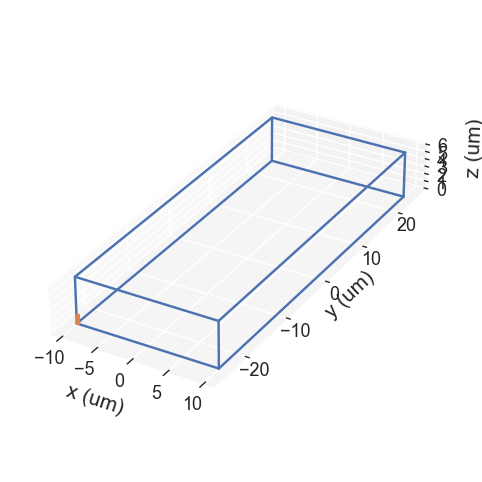

In [28]:
cx = 2e-7           # 10e-9 # Width x of the cell
cy = 2e-7           # 10e-9 # Width y of the cell
cz = 100e-8 


region = df.Region(p1=(-x,-y,0), p2=(x,y,z)) 
mesh   = df.Mesh(region=region, cell=(cx,cy,cz))
mesh.mpl()

In [23]:
m0 = (0,0,1)
def MZ_geometry(pos):
    x,y,z = pos

    if((-2*l<x<2*l and (-24*l<y<-15*l or 15*l<y<24*l) ) or ((-8*l<x<-4*l or 4*l<x<8*l) and -5*l<y<5*l)):
        return Ms_SmCo
    if(0<x<6*l and (10/4)*x - 5 <y< (10/4)*x - 10): 
        return Ms_SmCo
    else: return 0
    
system.m = df.Field(mesh, nvdim=3, value=m0, norm=MZ_geometry)


In [42]:
m0 = (0,0,1)
def MZ_geometry(pos):
    x,y,z = pos
    h = 10*l
    w = 2*l
    H = 15*l
    W = 4*l
    m = 1/W * (h/2-H)


    if(0<abs(y)<h/2 and W<abs(x)<W+w):
        return Ms_SmCo
    elif(h/2<abs(y)<H):
        x_0 = 1/m * (abs(y)-H)
        if(x_0 <abs(x)< x_0 + w):
            return Ms_SmCo
        else: return 0
    elif(0<abs(x)<w and H<abs(y)<h+H):
        return Ms_SmCo

    else: return 0

system.m = df.Field(mesh, nvdim=3, value=m0, norm=MZ_geometry)
        

Text(0.5, 1.0, 'mx')

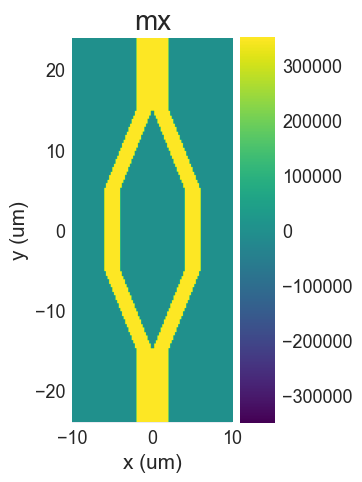

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
system.m.z.sel('z').mpl.scalar(ax=ax, vmin=-Ms_SmCo, vmax=Ms_SmCo)
ax.set_title('mx')
